In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

Cel:
Zaimplementowanie sieci neuronowej w PyTorch, która będzie modelować nieliniową funkcję jednej zmiennej. Celem zadania jest przewidzenie wartości wyjściowej funkcji dla danego wejścia (regresja).

Opis:
Zaimplementujesz sieć neuronową, która nauczy się odwzorowania nieliniowej funkcji  𝑦=sin(𝑥)+0,1𝑥2
  z dodanym szumem. Model będzie uczony na wygenerowanych danych, a następnie ocenisz jego wydajność.

Text(0, 0.5, 'y')

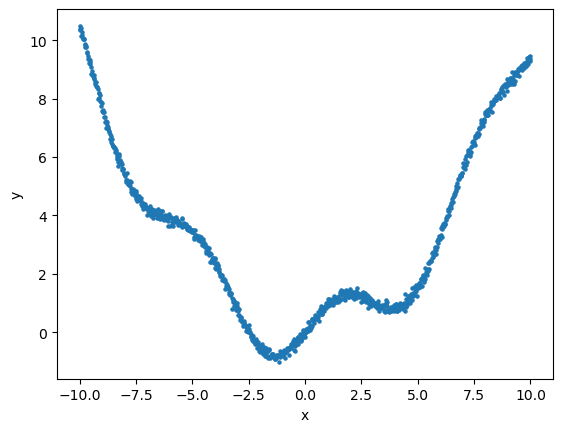

In [4]:
# 0.Ggenerowanie danych
x = np.linspace(-10, 10, 1000)

y = np.sin(x) + 0.1 * x**2 + np.random.normal(scale=0.1, size=x.shape)

plt.scatter(x, y, s=5, label="Dane z szumem")
plt.xlabel('x')
plt.ylabel('y')

In [6]:
# 1. Przygotowanie danych
x_data = torch.tensor(x, dtype=torch.float32).view(-1,1)
y_data = torch.tensor(y, dtype=torch.float32).view(-1,1)

In [8]:
# Podział na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [14]:
# 2. Definicja sieci
#sieć 3-warstwowa
class nonLinReg_3l(nn.Module):
    def __init__(self,n_input=1,n_hidden=18,n_output=1):
        super(nonLinReg_3l,self).__init__()
        activation=nn.Sigmoid
        
        self.input_layer=nn.Sequential(*[nn.Linear(n_input,n_hidden),activation()])
        self.output_layer=nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x=self.input_layer(x)
        x=self.output_layer(x)
        return x

In [16]:
#sieć 4-warstwowa
class nonLinReg_4l(nn.Module):
    def __init__(self,n_input=1,n_hidden1=12, n_hidden2=12, n_output=1):
        super(nonLinReg_4l,self).__init__()
        activation=nn.Sigmoid
        
        self.input_layer=nn.Sequential(*[nn.Linear(n_input,n_hidden1),activation()])
        self.hidden_layer=nn.Sequential(*[nn.Linear(n_hidden1,n_hidden2),activation()])
        self.output_layer=nn.Linear(n_hidden2,n_output)
    def forward(self,x):
        x=self.input_layer(x)
        x=self.hidden_layer(x)
        x=self.output_layer(x)
        return x

In [18]:
model = nonLinReg_3l()
#model = nonLinReg_4l()

In [20]:
# 3. Definicja funkcji stray i optymalizatora
loss_fcn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [21]:
#Trening sieci
loss_list = []
val_loss_list = []
n_iter = 8000

for epoch in range(n_iter):
    # Trening
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = loss_fcn(y_pred, y_train)
    loss_list.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()

    # Walidacja co 100 epok
    if (epoch+1) % 100 == 0:
        model.eval()
        with torch.no_grad():
            y_val_pred = model(x_test)
            val_loss = loss_fcn(y_val_pred, y_test)
            val_loss_list.append(val_loss.item())
        print(f'Epoch {epoch+1}/{n_iter}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch 100/8000, Train Loss: 8.7153, Val Loss: 7.9726
Epoch 200/8000, Train Loss: 7.6460, Val Loss: 6.9985
Epoch 300/8000, Train Loss: 6.1869, Val Loss: 5.6347
Epoch 400/8000, Train Loss: 4.6884, Val Loss: 4.2384
Epoch 500/8000, Train Loss: 3.4300, Val Loss: 3.0600
Epoch 600/8000, Train Loss: 2.5398, Val Loss: 2.2204
Epoch 700/8000, Train Loss: 1.9630, Val Loss: 1.6783
Epoch 800/8000, Train Loss: 1.5904, Val Loss: 1.3342
Epoch 900/8000, Train Loss: 1.3385, Val Loss: 1.1078
Epoch 1000/8000, Train Loss: 1.1657, Val Loss: 0.9576
Epoch 1100/8000, Train Loss: 1.0431, Val Loss: 0.8543
Epoch 1200/8000, Train Loss: 0.9504, Val Loss: 0.7782
Epoch 1300/8000, Train Loss: 0.8775, Val Loss: 0.7194
Epoch 1400/8000, Train Loss: 0.8185, Val Loss: 0.6727
Epoch 1500/8000, Train Loss: 0.7698, Val Loss: 0.6347
Epoch 1600/8000, Train Loss: 0.7290, Val Loss: 0.6033
Epoch 1700/8000, Train Loss: 0.6944, Val Loss: 0.5769
Epoch 1800/8000, Train Loss: 0.6646, Val Loss: 0.5545
Epoch 1900/8000, Train Loss: 0.6388, 

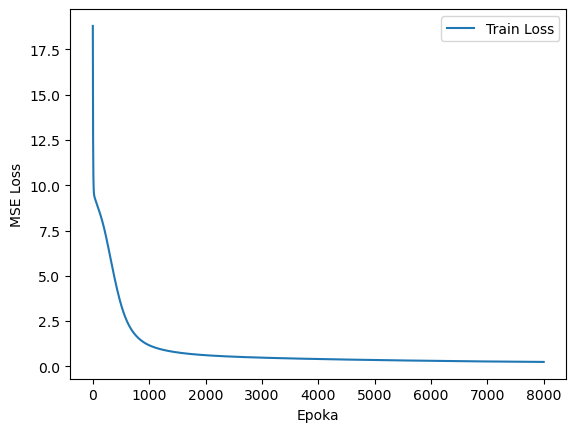

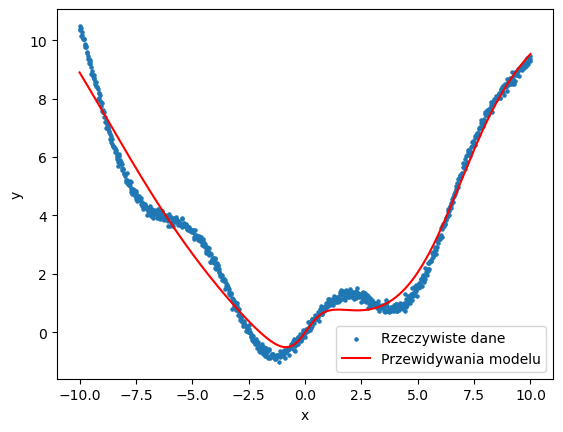

Final MSE on Train Set: 0.2454


In [24]:
# 5. Wizualizacja wyników
# Wykres funkcji straty
plt.figure()
plt.plot(loss_list, label="Train Loss")
plt.xlabel("Epoka")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# Wykres funkcji predykcji vs rzeczywiste dane
model.eval()
with torch.no_grad():
    y_mod = model(x_data).detach().numpy()

plt.figure()
plt.scatter(x, y, s=5, label="Rzeczywiste dane")
plt.plot(x, y_mod, color='red', label="Przewidywania modelu")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Wypisanie końcowej straty
print(f'Final MSE on Train Set: {loss.item():.4f}')